## Exploratory Data Analysis on Customer Bookings data for British Airways

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# get current working directory
cwd = os.getcwd()
# read the csv
df = pd.read_csv(cwd + "/customer_booking.csv",  encoding="ISO-8859-1")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.shape

(50000, 14)

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Sales Channel

In [7]:
bookings_done = df.sales_channel.value_counts() / df.sales_channel.count() *100
print(f"Number of bookings done: {bookings_done} %")

Number of bookings done: sales_channel
Internet    88.764
Mobile      11.236
Name: count, dtype: float64 %


### Trip Type

In [8]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


### Purchase Lead

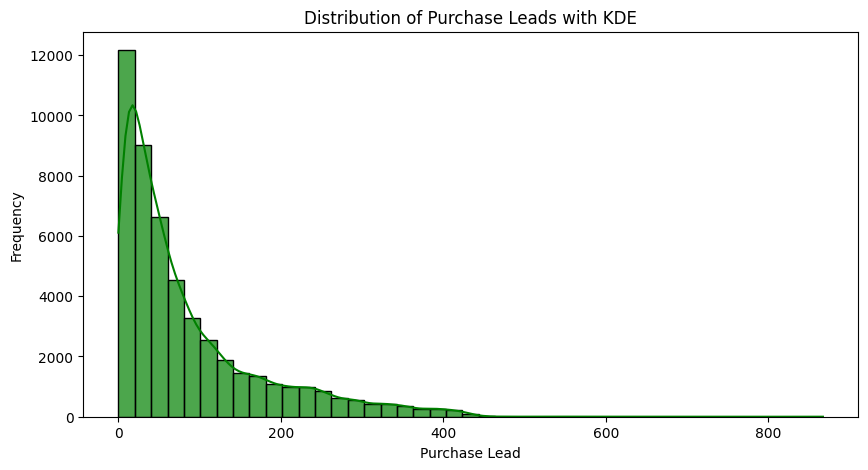

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Purchase Leads with KDE')
plt.xlabel('Purchase Lead')
plt.ylabel('Frequency')
plt.show()

Some bookings were made more than 2 years before the travel date, possibly due to cancellation and rebooking twice within a 6-month period. Treating these cases as outliers is crucial for accurate predictive modeling, given their potential impact on results.

In [10]:
(df.purchase_lead > 600).value_counts()

purchase_lead
False    49992
True         8
Name: count, dtype: int64

If we establish the assumption that customers do not book more than 1 and a half years in advance, we will exclude all entries with a "purchase_lead" exceeding 600 days.

In [11]:
# filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead < 600 ]

### Length Of Stay

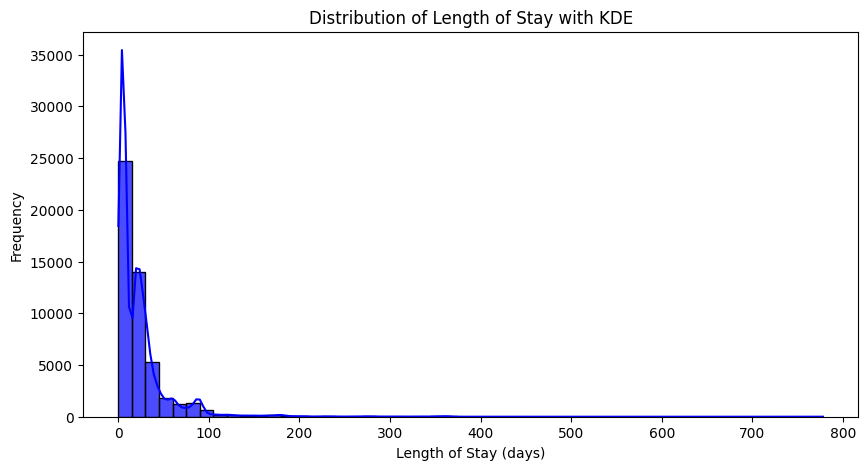

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="length_of_stay", binwidth=15, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Length of Stay with KDE')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

Let's see how many entries do we have that exceeds length of stay more than 100 days.

In [13]:
df[df.length_of_stay > 500].booking_complete.value_counts()

booking_complete
0    9
1    1
Name: count, dtype: int64

To determine whether to exclude entries with stays exceeding 600 days, additional business knowledge is required, as there could be various reasons for such bookings. However, for the current analysis, the focus will be on bookings with a length of stay less than 500 days.

In [14]:
# filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead < 500 ]

### Flight Day

We plan to associate each flight day with a corresponding week number.

In [15]:
mapping = {"Mon" : 1, "Tue" : 2, "Wed" : 3, "Thu" : 4, "Fri" : 5, "Sat" : 6, "Sun" : 7}
df.flight_day = df.flight_day.map(mapping)
df.flight_day.value_counts()

flight_day
1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: count, dtype: int64

Most of the customers want to travel on Monday and choose Saturday as least preffered day as flight day.  

### Booking Origin

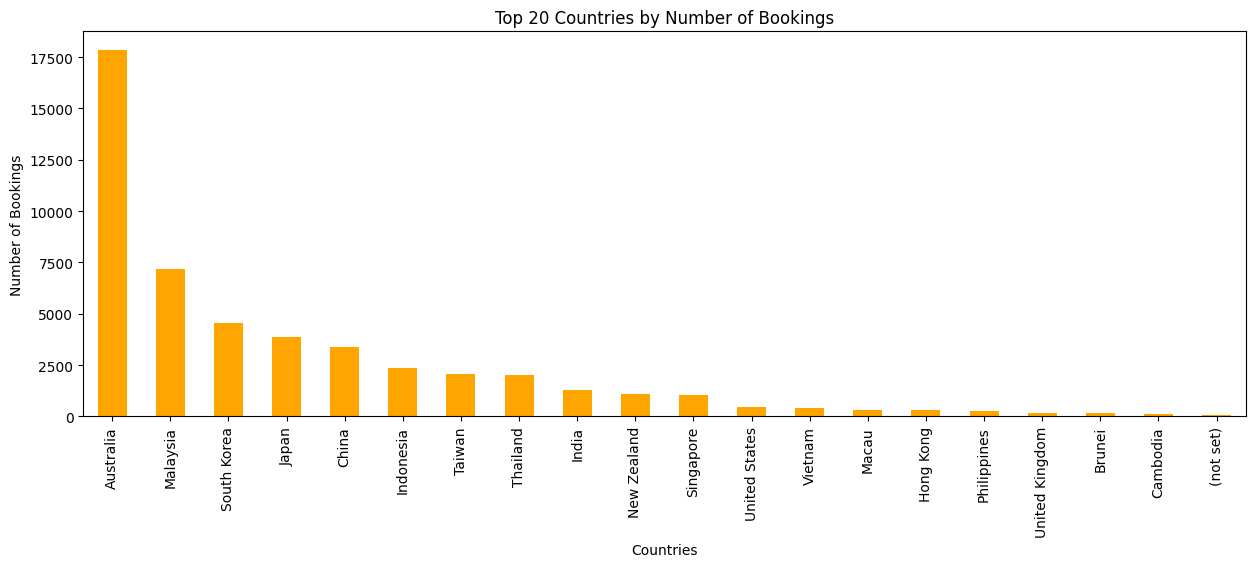

In [16]:
plt.figure(figsize=(15, 5))
ax = df['booking_origin'].value_counts()[:20].plot(kind="bar", color='orange')
ax.set_xlabel("Countries")
ax.set_ylabel("Number of Bookings")
ax.set_title("Top 20 Countries by Number of Bookings")
plt.show()

Above chart shows travellers from which country had maximum booking applications. 

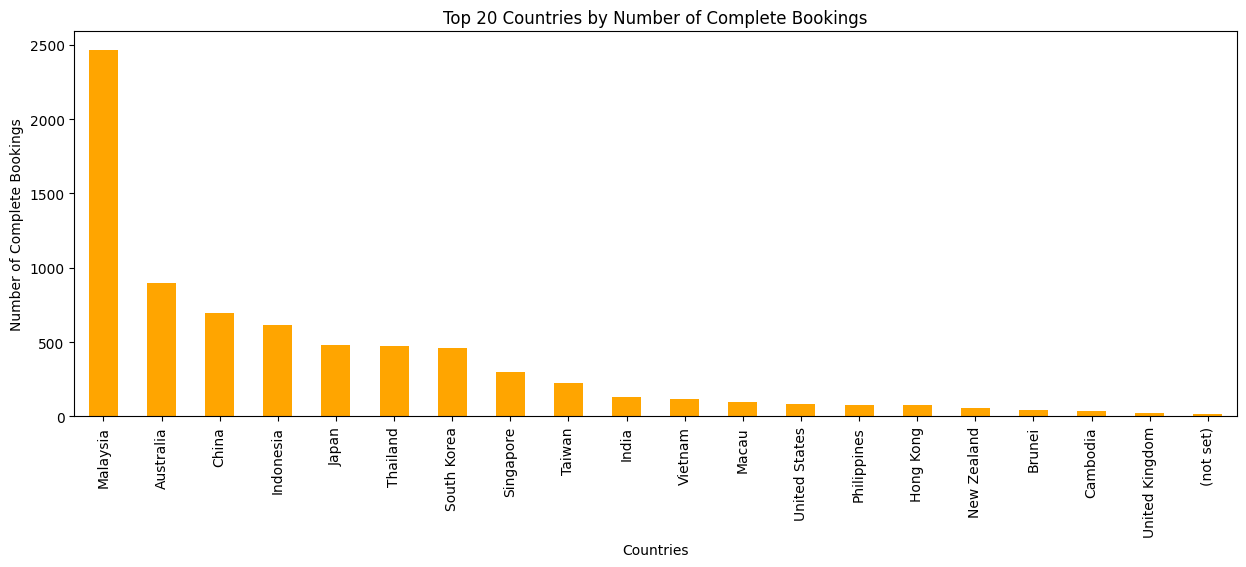

In [17]:
plt.figure(figsize=(15, 5))
ax = df[df.booking_complete == 1]['booking_origin'].value_counts()[:20].plot(kind="bar", color='orange')
ax.set_xlabel("Countries")
ax.set_ylabel("Number of Complete Bookings")
ax.set_title("Top 20 Countries by Number of Complete Bookings")
plt.show()

Above chart shows travellers from which country had their booking complete.  

### Booking complete

In [18]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100
unsuccessful_booking_per = 100-successful_booking_per
print(f"Out of 50000 booking entries only {round(successful_booking_per,2)} % bookings were successfull/complete and {round(unsuccessful_booking_per,2)} were not complete")

Out of 50000 booking entries only 85.04 % bookings were successfull/complete and 14.96 were not complete


## Export the dataset to csv



In [19]:
df.to_csv(cwd + "/filtered_customer_booking.csv")